<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/Yolo8_v1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
url = "https://mega.nz/file/UzFWmb7J#vwi-ZgSJBLGC5uQ912vpmZyPyxJEfwc2sCjy7jtpoM8"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip GroceryDataset.v2-v2.yolov8.zip

In [ ]:
!pip install ultralytics

In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Image_dir = '/content/GroceryDataset.v2/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
image = cv2.imread("/content/GroceryDataset.v2/train/images/IMG_0022_jpg.rf.2419d122655b4025ab500fdd6262448c.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 159MB/s]



image 1/1 /content/GroceryDataset.v2/train/images/IMG_0022_jpg.rf.2419d122655b4025ab500fdd6262448c.jpg: 416x416 (no detections), 227.5ms
Speed: 6.6ms preprocess, 227.5ms inference, 12.4ms postprocess per image at shape (1, 3, 416, 416)


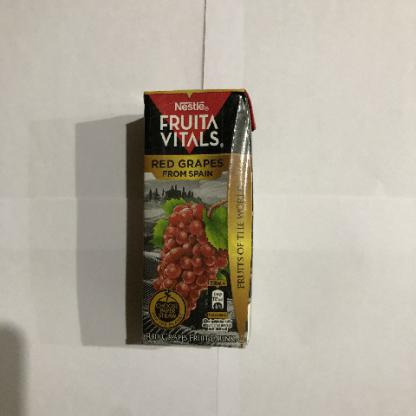

In [6]:
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/GroceryDataset.v2/train/images/IMG_0022_jpg.rf.2419d122655b4025ab500fdd6262448c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
Final_model = YOLO('yolov8n.pt')

Result_Final_model = Final_model.train(data="/content/GroceryDataset.v2/data.yaml", epochs=10, imgsz=416, batch=64, lr0=0.0001, dropout=0.15, device='cpu')


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/GroceryDataset.v2/data.yaml, epochs=10, patience=50, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/GroceryDataset.v2/train/labels... 6981 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6981/6981 [00:05<00:00, 1385.33it/s]


train: New cache created: /content/GroceryDataset.v2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/GroceryDataset.v2/valid/labels... 2013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2013/2013 [00:01<00:00, 1336.41it/s]


val: New cache created: /content/GroceryDataset.v2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.5347      3.423     0.9953          5        416: 100%|██████████| 110/110 [13:16<00:00,  7.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:23<00:00,  5.24s/it]

                   all       2013       2016      0.659      0.548      0.654      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.5053      1.362     0.9675          5        416: 100%|██████████| 110/110 [12:46<00:00,  6.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:23<00:00,  5.25s/it]

                   all       2013       2016      0.918      0.919      0.978      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.5016     0.9024     0.9551          5        416: 100%|██████████| 110/110 [12:52<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:25<00:00,  5.35s/it]

                   all       2013       2016      0.959      0.946      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      0.491     0.7314     0.9413          5        416: 100%|██████████| 110/110 [12:52<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:25<00:00,  5.34s/it]

                   all       2013       2016       0.98      0.974      0.992      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.4821     0.6277     0.9396          5        416: 100%|██████████| 110/110 [12:42<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:25<00:00,  5.34s/it]

                   all       2013       2016       0.96      0.951      0.986      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.4619     0.5293     0.9276          5        416: 100%|██████████| 110/110 [12:36<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:23<00:00,  5.20s/it]

                   all       2013       2016      0.989      0.994      0.993      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.4494     0.4592     0.9188          5        416: 100%|██████████| 110/110 [12:48<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:24<00:00,  5.26s/it]

                   all       2013       2016      0.994      0.995      0.993      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.4341     0.4169     0.9109          5        416: 100%|██████████| 110/110 [12:42<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:24<00:00,  5.27s/it]

                   all       2013       2016      0.997      0.993      0.993      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.4131     0.3792     0.9078          5        416: 100%|██████████| 110/110 [12:27<00:00,  6.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:27<00:00,  5.46s/it]

                   all       2013       2016      0.998      0.996      0.994      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.3976     0.3493     0.8952          5        416: 100%|██████████| 110/110 [12:31<00:00,  6.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:22<00:00,  5.19s/it]

                   all       2013       2016      0.998      0.996      0.994      0.906



10 epochs completed in 2.364 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3010523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:13<00:00,  4.59s/it]


                   all       2013       2016      0.998      0.996      0.994      0.906
Bisconni Chocolate Chip Cookies       2013         90      0.998          1      0.995      0.943
         Coca Cola Can       2013         91      0.999      0.989      0.987      0.904
Colgate Maximum Cavity Protection       2013         68      0.997          1      0.995      0.904
                 Fanta       2013         94      0.998      0.989      0.986      0.937
  Fresher Guava Nectar       2013        116      0.999          1      0.995      0.937
         Islamabad Tea       2013        108      0.999          1      0.995      0.911
Kolson Slanty Jalapeno       2013         75      0.998          1      0.995      0.864
Kurkure Chutney Chaska       2013         83      0.998          1      0.995      0.942
      LU Candi Biscuit       2013         94          1      0.999      0.995      0.885
       LU Oreo Biscuit       2013         72      0.999          1      0.995      0.904
 

In [8]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

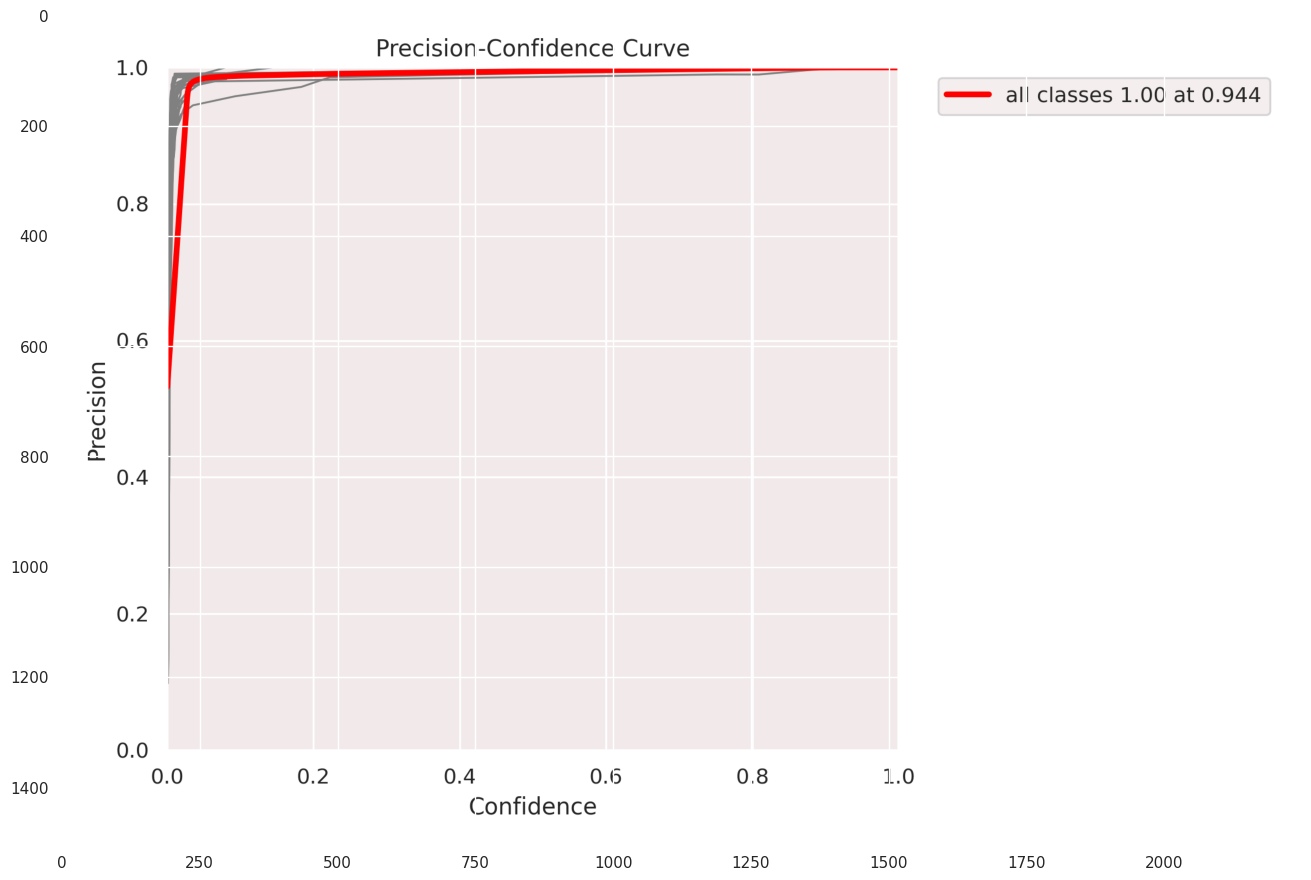

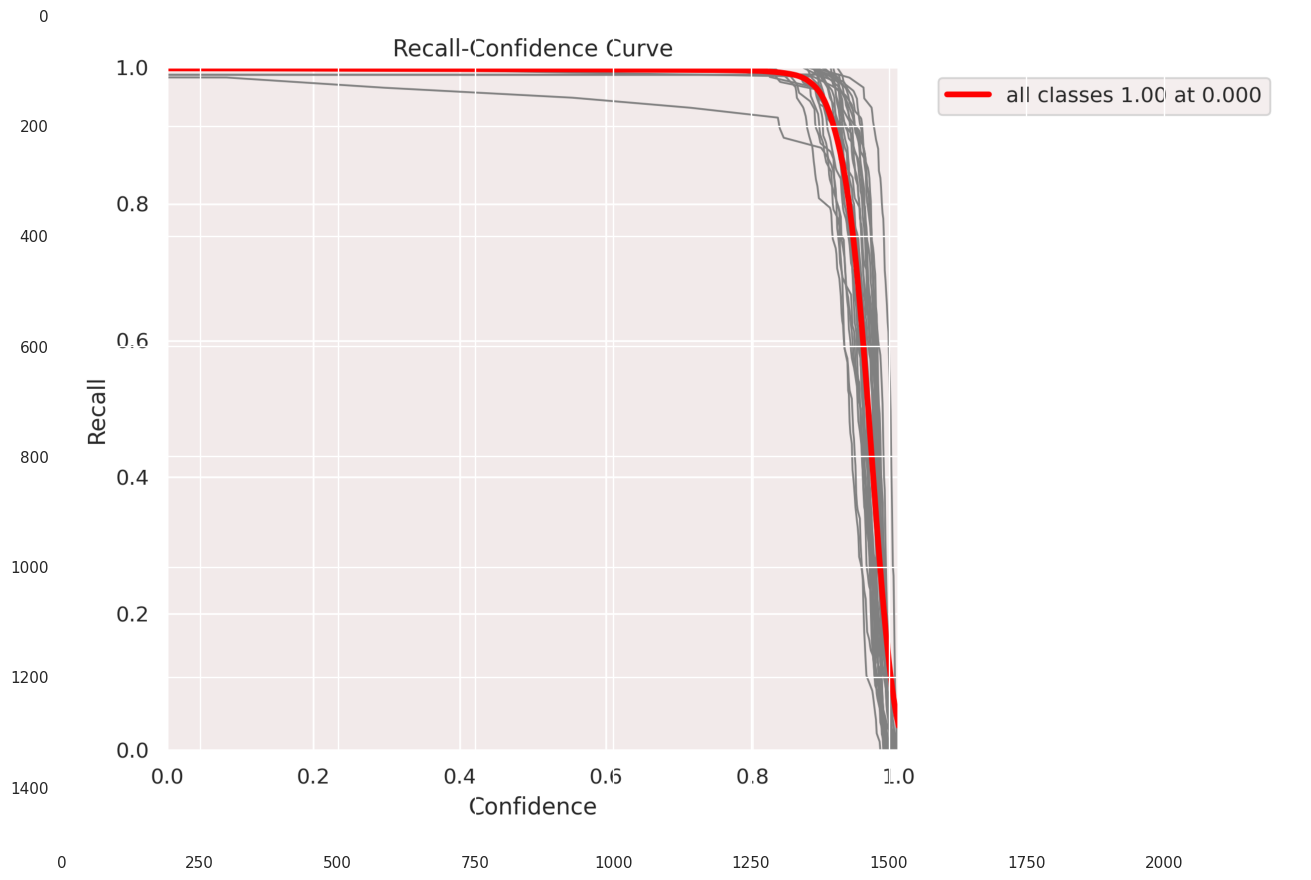

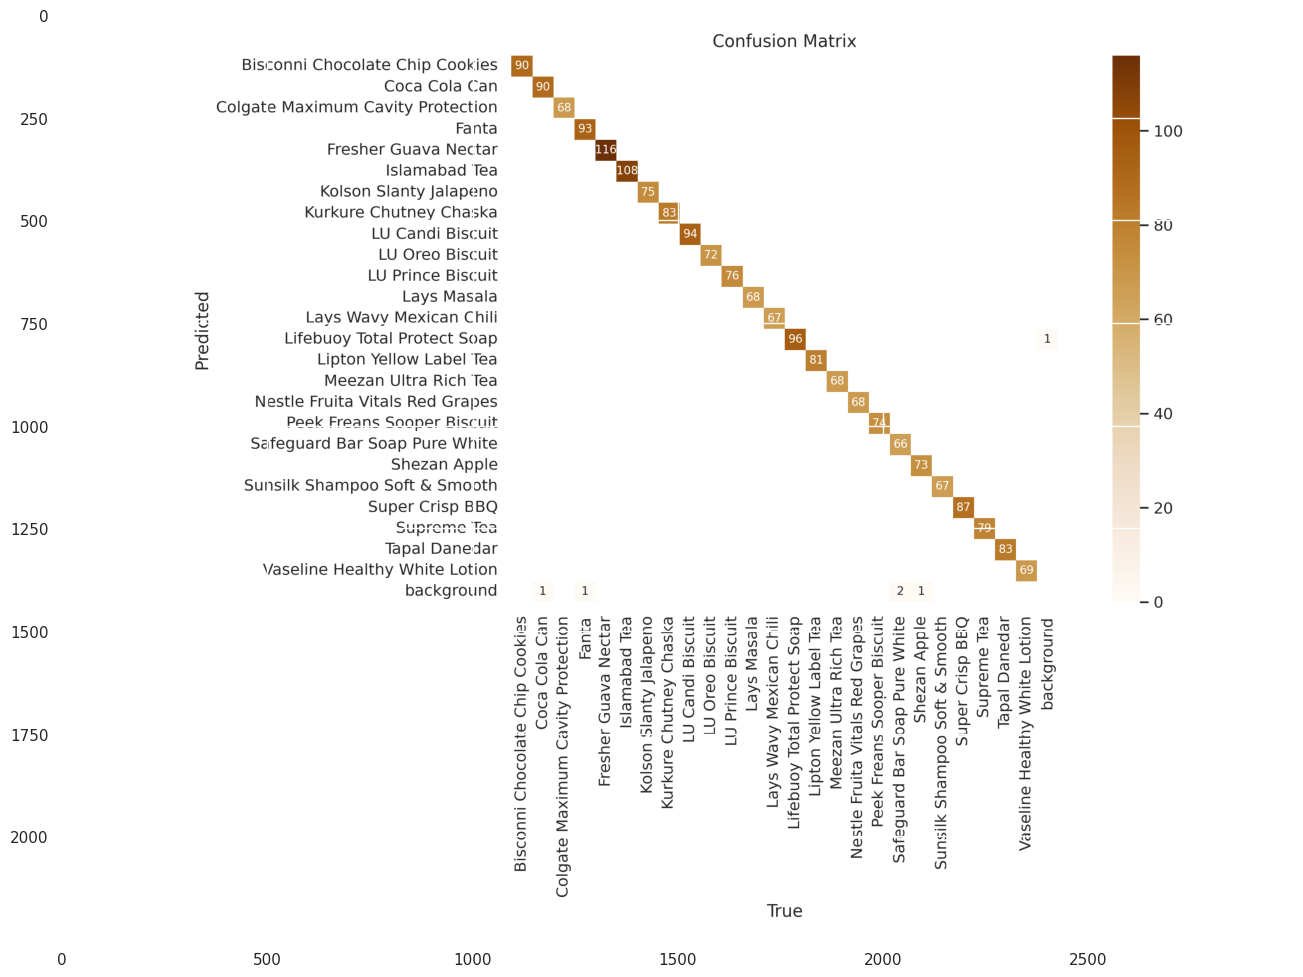

In [9]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [10]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.53472,3.42300,0.99530,0.65916,0.54820,0.65409,0.57640,0.51730,2.57020,0.90578,0.000114,0.000114,0.000114
1,2,0.50532,1.36230,0.96749,0.91786,0.91913,0.97787,0.85562,0.52766,1.12760,0.89918,0.000206,0.000206,0.000206
2,3,0.50162,0.90240,0.95514,0.95946,0.94566,0.98453,0.84726,0.55422,0.91818,0.90520,0.000276,0.000276,0.000276
3,4,0.49101,0.73136,0.94126,0.98047,0.97438,0.99237,0.87255,0.51126,0.70415,0.88823,0.000243,0.000243,0.000243
4,5,0.48215,0.62769,0.93964,0.96005,0.95057,0.98590,0.87639,0.49124,0.68484,0.87143,0.000243,0.000243,0.000243
5,6,0.46194,0.52930,0.92763,0.98883,0.99374,0.99306,0.88565,0.49432,0.51959,0.86881,0.000208,0.000208,0.000208
6,7,0.44939,0.45916,0.91878,0.99416,0.99489,0.99284,0.88807,0.47059,0.46069,0.85722,0.000174,0.000174,0.000174
7,8,0.43413,0.41692,0.91094,0.99744,0.99316,0.99290,0.89513,0.46258,0.40941,0.85021,0.000140,0.000140,0.000140
8,9,0.41305,0.37919,0.90784,0.99826,0.99633,0.99391,0.90164,0.43583,0.37299,0.84164,0.000106,0.000106,0.000106
9,10,0.39761,0.34932,0.89523,0.99817,0.99586,0.99395,0.90624,0.43031,0.35340,0.83716,0.000072,0.000072,0.000072


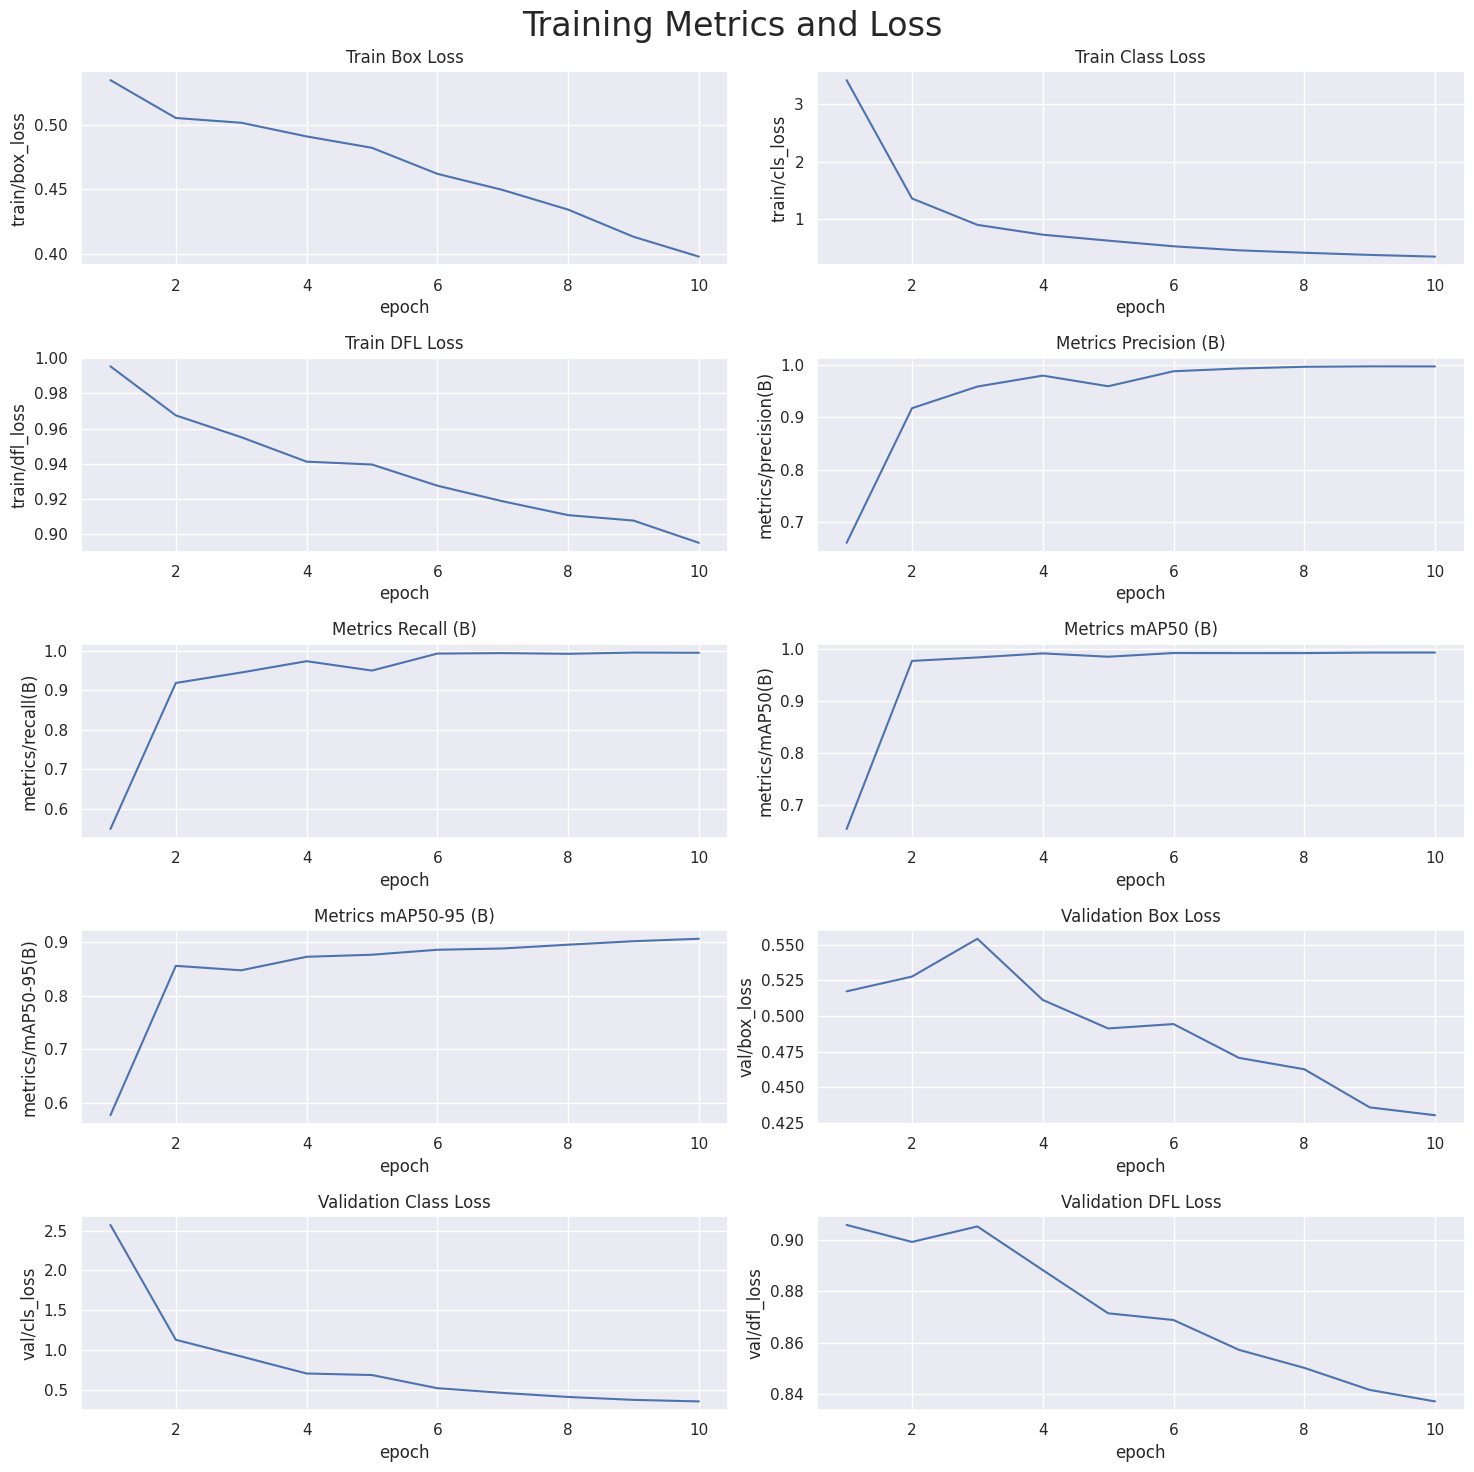

In [11]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0, 0].set(title='Train Box Loss')
axs[0, 1].set(title='Train Class Loss')
axs[1, 0].set(title='Train DFL Loss')
axs[1, 1].set(title='Metrics Precision (B)')
axs[2, 0].set(title='Metrics Recall (B)')
axs[2, 1].set(title='Metrics mAP50 (B)')
axs[3, 0].set(title='Metrics mAP50-95 (B)')
axs[3, 1].set(title='Validation Box Loss')
axs[4, 0].set(title='Validation Class Loss')
axs[4, 1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [12]:
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3010523 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/GroceryDataset.v2/test/labels... 1006 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1006/1006 [00:00<00:00, 1465.16it/s]


val: New cache created: /content/GroceryDataset.v2/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]


                   all       1006       1006      0.997      0.999      0.995       0.91
Bisconni Chocolate Chip Cookies       1006         33      0.997          1      0.995      0.945
         Coca Cola Can       1006         44      0.998          1      0.995      0.911
Colgate Maximum Cavity Protection       1006         54      0.998          1      0.995      0.917
                 Fanta       1006         42      0.997          1      0.995      0.948
  Fresher Guava Nectar       1006         59      0.997          1      0.995      0.942
         Islamabad Tea       1006         57      0.998          1      0.995      0.915
Kolson Slanty Jalapeno       1006         35      0.997          1      0.995      0.837
Kurkure Chutney Chaska       1006         32      0.997          1      0.995       0.91
      LU Candi Biscuit       1006         44      0.998          1      0.995      0.898
       LU Oreo Biscuit       1006         33      0.999          1      0.995      0.935
 

In [13]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9972793815343907
metrics/recall(B):  0.999047619047619
metrics/mAP50(B):  0.9949148936170213
metrics/mAP50-95(B):  0.9097084300183744


In [14]:
image_dir = '/content/GroceryDataset.v2/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 Fresher Guava Nectar, 70.2ms
Speed: 2.9ms preprocess, 70.2ms inference, 6.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 LU Candi Biscuit, 62.0ms
Speed: 1.3ms preprocess, 62.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Fanta, 60.4ms
Speed: 1.5ms preprocess, 60.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Safeguard Bar Soap Pure White, 59.1ms
Speed: 1.8ms preprocess, 59.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Sunsilk Shampoo Soft & Smooth, 68.3ms
Speed: 1.3ms preprocess, 68.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Vaseline Healthy White Lotion, 71.1ms
Speed: 1.3ms preprocess, 71.1ms inference, 1.2ms postprocess per imag

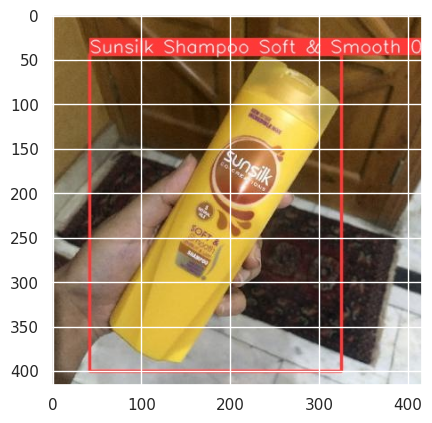

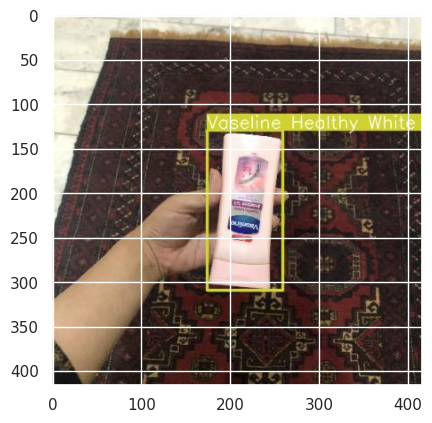

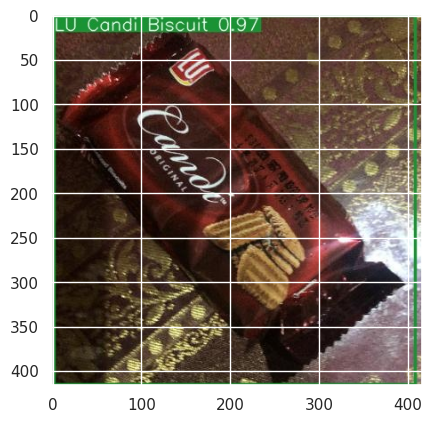

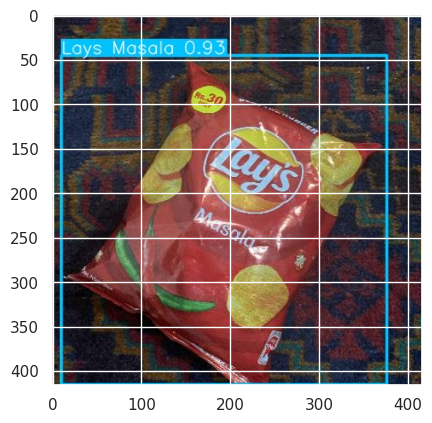

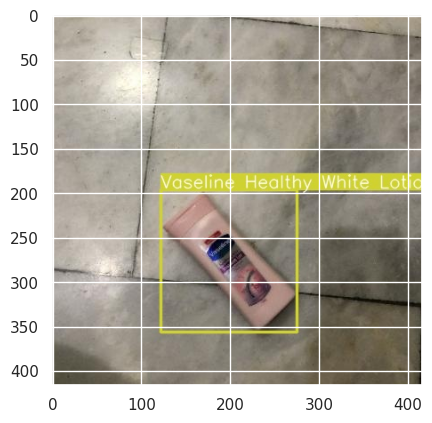

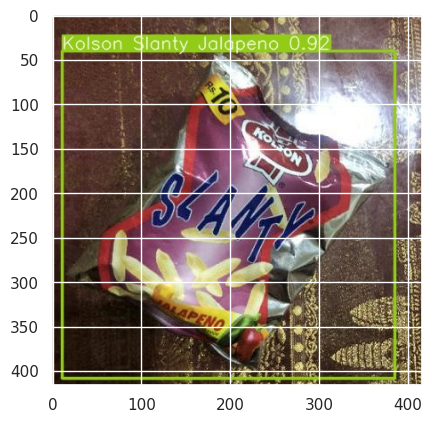

In [15]:
for i in range(6,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [ ]:
########################################################

In [26]:
best="/content/runs/detect/train/weights/best.pt"
last="/content/runs/detect/train/weights/last.pt"

image_path="/content/GroceryDataset.v2/valid/images/IMG_0023_jpg.rf.966df5982eea2fda2aa8d60c407e4ad6.jpg"

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict2/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
model=YOLO(best)
results= model(source="/content/GroceryDataset.v2/valid/images", save=True)

In [32]:
def car_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 416x416 1 Coca Cola Can, 62.1ms
Speed: 1.4ms preprocess, 62.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Fresher Guava Nectar, 57.4ms
Speed: 2.0ms preprocess, 57.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Lays Masala, 61.8ms
Speed: 1.2ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Lipton Yellow Label Tea, 63.1ms
Speed: 1.7ms preprocess, 63.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Kurkure Chutney Chaska, 41.9ms
Speed: 1.7ms preprocess, 41.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Supreme Tea, 43.7ms
Speed: 1.1ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Safeguard Bar Soap Pure White, 43.5ms
Speed: 1.1ms preprocess, 43.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Lipton Yellow Lab

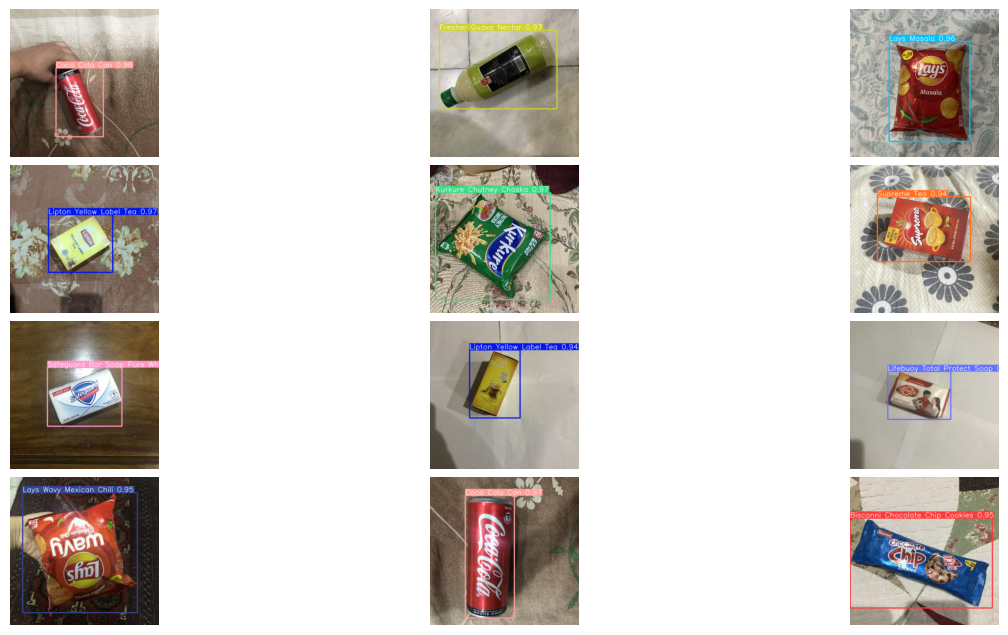

In [37]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/GroceryDataset.v2/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 12)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 8))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = car_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots

plt.subplots_adjust(wspace=0.05, hspace=0.05)